In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import seaborn as sns

from urllib.request import Request, urlopen
from urllib.parse import urlencode
from collections import Counter
from zipfile import ZipFile
from io import BytesIO
from xmltodict import parse

# HW2

## Question #1

For this question, we are going to use a data set of [the top grossing movies between 2007 and 2011](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv).

1. Ingest the data as a pandas data frame.

2. Inspect the data and explain what it contains.

3. Count how many top grossing movies each studio made between 2007 and 2011, and visualize it as a bar chart.

4. Convert your bar chart above into a pie chart.

5. Make a cross-tabulation of Genres against the Year, and observe that the data contains errors. Correct the errors using 'replace' method then cross-tabulate again.

6. Draw a 'heat-map' of the corrected cross-tabulation you got above.

We download data from internet.

In [3]:
data = pd.read_csv("https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv")

data.drop([45], axis=0, inplace=True)
data

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


We counted how many top-grossing films each studio made between 2007 and 2011 and visualized it as a bar chart.

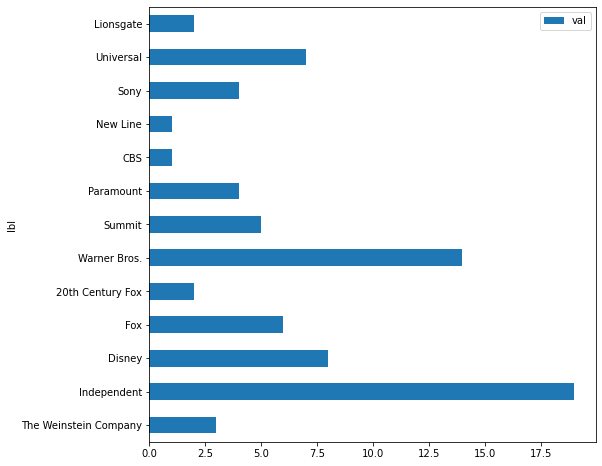

In [4]:
mov = Counter(data['Lead Studio'])
lbl = list(mov.keys())
val = mov.values()
df = pd.DataFrame(val)
df2 = pd.DataFrame(lbl)
df = df.rename(columns={0:'val'})
df2 = df2.rename(columns={0:'lbl'})
dff = pd.concat((df,df2), axis = 1)
bar = dff.plot.barh(x='lbl',y='val', rot=0,figsize = (8,8) )

We turned this into a pie chart.

([<matplotlib.patches.Wedge at 0x1fea4116280>,
 [Text(1.091552638381225, 0.13606188901741217, 'The Weinstein Company'),
  Text(0.5630735633115591, 0.9449593442575315, 'Independent'),
  Text(-0.6016429671278826, 0.9208831305358774, 'Disney'),
  Text(-1.007350652788397, 0.4418649820101049, 'Fox'),
  Text(-1.096242940125184, 0.09083730635423141, '20th Century Fox'),
  Text(-0.920883144618347, -0.6016429455730573, 'Warner Bros.'),
  Text(-0.22573690957226764, -1.076588522907783, 'Summit'),
  Text(0.18105402524925104, -1.0849974377578242, 'Paramount'),
  Text(0.39985874647465175, -1.0247502051074302, 'CBS'),
  Text(0.4831162279488487, -0.9882300897526224, 'New Line'),
  Text(0.6756339679178845, -0.8680545728210497, 'Sony'),
  Text(0.9882300699633565, -0.48311626842843913, 'Universal'),
  Text(1.0962429401251839, -0.09083730635423204, 'Lionsgate')])

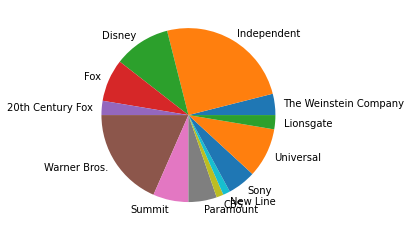

In [5]:
x = dff['lbl']
y = dff['val']
#y = np.array(y)
plt.pie(y, labels = x)

We corrected the 'Genre' column, created a crosstabulate, and finally created a heatmap.

<AxesSubplot:xlabel='Genre', ylabel='Year'>

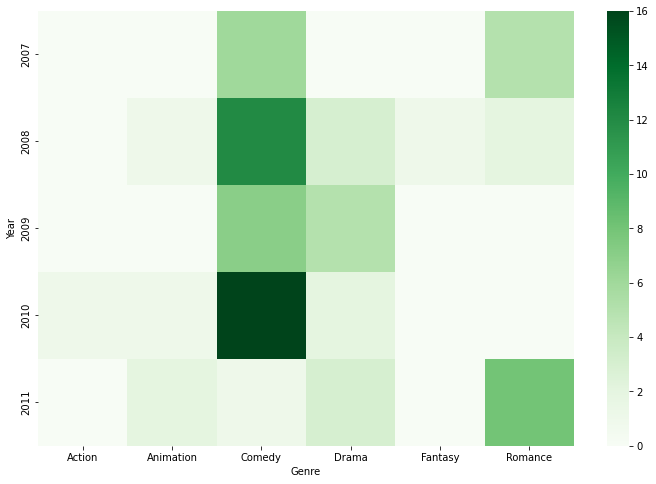

In [6]:
data['Genre'] = data['Genre'].str.replace('Comdy','Comedy')
data['Genre'] = data['Genre'].str.replace('Romence','Romance')
data['Genre'] = data['Genre'].str.replace('comedy','Comedy')
data['Genre'] = data['Genre'].str.replace('romance','Romance')
cross = pd.crosstab(data['Year'], data['Genre'])
plt.rcParams['figure.figsize'] = 12,8
sns.heatmap(cross, cmap='Greens')

## Question #2

For this question, we are going to use the [Open Flight Data](https://openflights.org/data.html#route).

1. Find the link for the data from the link I gave above. Ingest it as a pandas data frame.

2. Inspect it and explain what it contains.

3. Construct a data frame that contains 3 columns: source airport, target airport and the number of flights from source to target.

4. Filter the data frame and select only the routes that has 10 or more flights between them.

5. Construct a network using the `networkx` library that I used in our last lecture using the data frame you constructed in the previous step.

6. Visualize the network.

We downloaded data from internet.

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat',
                  names=["Airline","Airline ID" ,"Source airport","Source airport ID", "Destination airport", "Coverage","Codeshare","Stops","Equipment"])
data

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Coverage,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


We constructed a data frame that contains 3 columns: source airport, target airport and the number of flights from source to target and We filtered out airports with more than 10 flights between them.

In [16]:
numberflights = data.iloc[:, [2,4]]
numberflights = numberflights.pivot_table(columns=['Source airport','Destination airport'], aggfunc='size')
print(numberflights)
filters= numberflights.where(numberflights>10).dropna()
print(filters)

Source airport  Destination airport
AAE             ALG                    1
                CDG                    1
                IST                    1
                LYS                    1
                MRS                    2
                                      ..
ZYI             SZX                    1
                WUH                    1
                XIY                    1
                XMN                    1
ZYL             DAC                    4
Length: 37595, dtype: int64
Source airport  Destination airport
ATL             DEN                    11.0
                DFW                    11.0
                MIA                    12.0
                ORD                    19.0
AUH             MCT                    12.0
BKK             HKG                    12.0
CAN             HGH                    12.0
CDG             JFK                    11.0
CNX             BKK                    11.0
DEN             ATL                    11.0
DOH      

We builded and visualized the network.

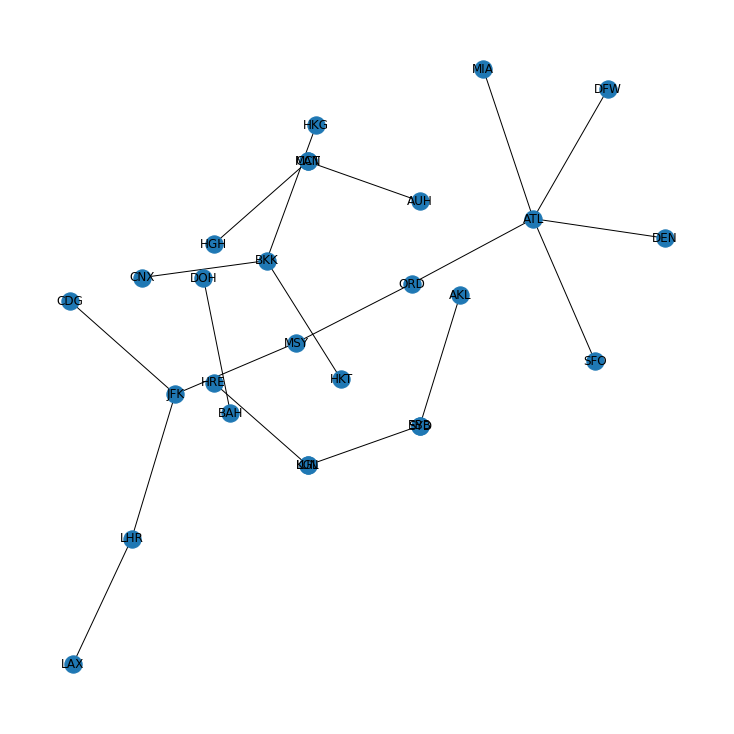

In [13]:
f2 = filters.reset_index()
del f2[0]
f2.columns = ['source','target']

plt.rcParams['figure.figsize'] = 10,10

graph = nx.from_pandas_edgelist(pd.DataFrame(f2))
nx.draw_kamada_kawai(graph,with_labels=True)

## Question #3

For this question we are going to use the [NBA Data](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) that I have shown you in our last lecture.

1. Ingest the 2019 data as a pandas data frame.

2. Inspect it and explain what it contains.

3. Write a function that takes two arguments: the NBA data frame and a 'game type' argument which can be 'regular' or 'playoff'. The function must return another pandas data frame of list of players, the number of asists, blocks and rebounds for each player. Evaluate your function on both regular games, and then on playoff games.

4. Write another function that takes two argumentas as before: the NBA data frame and the game type. The function must return the list of teams and the number of wins during the regular season or the play offs as a data frame. Visualize the returned data frame as a bar chart for both regular games, and then on playoff games.

We downloaded data from internet.

In [ ]:
df = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2019-20_pbp.csv')
data = df
data

We builded function for playerstats.

In [64]:
def playerstats(data,gametype):
    if gametype == 'regular':
        regular = data.where(data['GameType'] == "regular")
        rebounder = regular.groupby(['Rebounder']).size()
        rebounder = rebounder.to_frame()
        rebounder = rebounder.rename(columns={0:'rebounds'})
        blocker = regular.groupby(['Blocker']).size()
        blocker = blocker.to_frame()
        blocker = blocker.rename(columns={0:'blocks'})
        assister = regular.groupby(['Assister']).size()
        assister = assister.to_frame()
        assister = assister.rename(columns={0:'assists'})
        dff = pd.concat((blocker,assister,rebounder), axis = 1)
        print(dff)
    elif gametype == 'playoff':
        playoff = data.where(data['GameType'] == "playoff")
        rebounder = playoff.groupby(['Rebounder']).size()
        rebounder = rebounder.to_frame()
        rebounder = rebounder.rename(columns={0:'rebounds'})
        blocker = playoff.groupby(['Blocker']).size()
        blocker = blocker.to_frame()
        blocker = blocker.rename(columns={0:'blocks'})
        assister = playoff.groupby(['Assister']).size()
        assister = assister.to_frame()
        assister = assister.rename(columns={0:'assists'})
        dff = pd.concat((blocker,assister,rebounder), axis = 1)
        print(dff)
    else:
        print("Your gametype is false")

In [74]:
playerstats(data,'regular')

                        blocks  assists  rebounds
A. Aminu - aminual01       8.0     21.0      87.0
A. Baynes - baynear01     23.0     67.0     237.0
A. Bradley - bradlav01     5.0     63.0     115.0
A. Burks - burksal01      17.0    189.0     282.0
A. Caruso - carusal01     18.0    124.0     123.0
...                        ...      ...       ...
M. Bolden - boldema01      NaN      NaN       2.0
M. Strus - strusma01       NaN      NaN       1.0
T. Owens - owensta01       NaN      NaN       3.0
T. Zeller - zellety01      NaN      NaN       4.0
Team                       NaN      NaN   17741.0

[529 rows x 3 columns]


In [75]:
playerstats(data,'playoff')

                              blocks  assists  rebounds
A. Burks - burksal01             3.0      7.0      15.0
A. Caruso - carusal01           12.0     59.0      48.0
A. Davis - davisan02            30.0     73.0     204.0
A. Horford - horfoal01           5.0      9.0      29.0
A. Iguodala - iguodan01         13.0     31.0      54.0
...                              ...      ...       ...
S. Brown - brownst02             NaN      NaN       1.0
T. Cook - cookty01               NaN      NaN       2.0
T. Fall - fallta01               NaN      NaN       1.0
T. Horton-Tucker - hortota01     NaN      NaN       5.0
Team                             NaN      NaN    1337.0

[208 rows x 3 columns]


We builded function for teams.

In [80]:
def teamwin(data,gametype):
    if gametype == 'regular':
        regular = data.where(data['GameType'] == "regular")
        r = Counter(regular['WinningTeam'])
        dfr = pd.DataFrame.from_dict(r, orient='index').reset_index()
        dfr = dfr.rename(columns={'index':'Team', 0:'Number Of Wins'})
        dfr = dfr.drop(labels=30, axis=0)
        print(dfr)
        bar = dfr.plot.bar(x='Team',y='Number Of Wins', rot=0, figsize = (14,10))
        print(bar)
    elif gametype == 'playoff':
        playoff = data.where(data['GameType'] == "playoff")
        p = Counter(playoff['WinningTeam'])
        dfp = pd.DataFrame.from_dict(p, orient='index').reset_index()
        dfp = dfp.rename(columns={'index':'Team', 0:'Number Of Wins'})
        dfp = dfp.drop(labels=0, axis=0)
        print(dfp)
        bar = dfp.plot.bar(x='Team',y='Number Of Wins', rot=0, figsize = (14,10))
        print(bar)
    else:
        print("Your gametype is false")

   Team  Number Of Wins
0   TOR           24986
1   LAC           23744
2   CHO           10527
3   DET            9047
4   ORL           15176
5   MIN            9513
6   MIA           20460
7   PHI           20118
8   DAL           20127
9   SAS           15121
10  UTA           20161
11  PHO           16132
12  DEN           21500
13  ATL            9921
14  MIL           27524
15  BOS           22510
16  BRK           16842
17  CHI           10360
18  WAS           11865
19  POR           17153
20  LAL           24691
21  CLE            9036
22  HOU           21347
23  OKC           20454
24  MEM           16311
25  NYK            9958
26  GSW            7041
27  IND           20549
28  NOP           14372
29  SAC           14263
AxesSubplot(0.125,0.125;0.775x0.755)


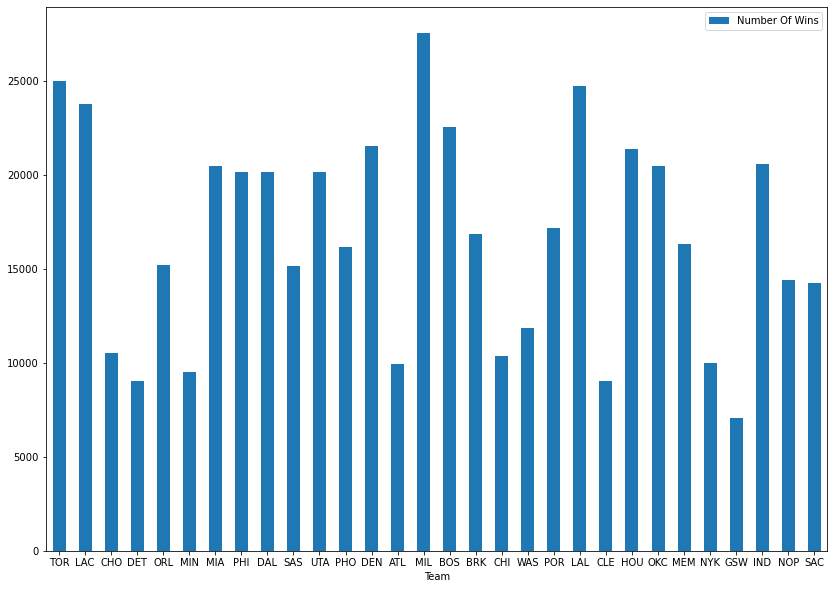

In [81]:
teamwin(data,'regular')

   Team  Number Of Wins
1   DEN            3981
2   TOR            3282
3   BOS            4674
4   LAC            3216
5   ORL             494
6   MIA            6495
7   HOU            2298
8   POR             519
9   UTA            1306
10  DAL            1059
11  MIL            2426
12  LAL            7261
13  OKC            1445
AxesSubplot(0.125,0.125;0.775x0.755)


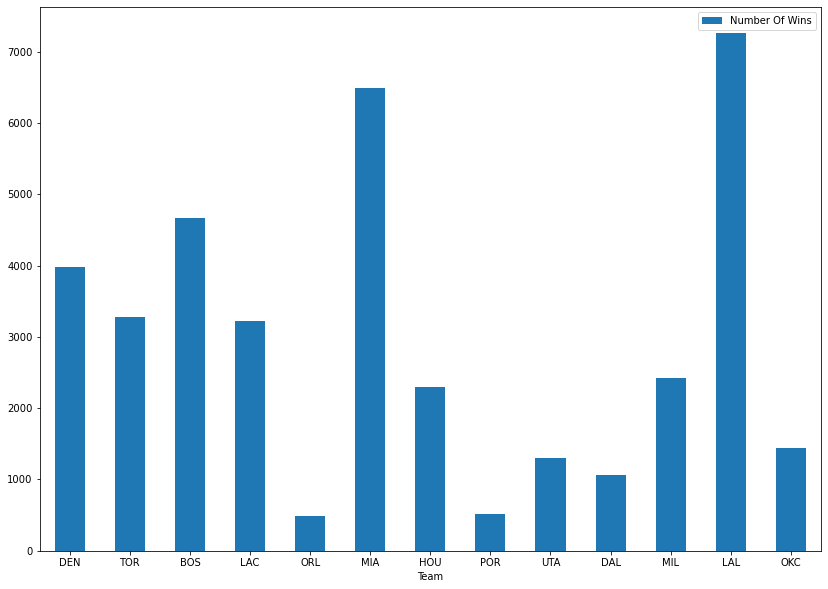

In [82]:
teamwin(data,'playoff')